# Task 2: Prediction using Unsupervised ML
In this task, the optimal number of cluster have to be found from the popular 'iris' dataset.
Submitted by- Anushree Patil
Batch: GRIPDEC20


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



# reading dataset

In [4]:
df=pd.read_csv('Z:\sparks foundation\iris.csv')

In [5]:
df.head() 

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [6]:
#reading the shape of the dataset
df.shape

(150, 6)

# Checking the overall information

In [7]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


# Checking the dataset from statistical point of view

In [8]:
#checking the dataset from statistical point of view
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [10]:
#four features (sepal length, sepal width, petal length and petal width) are going to be needed for cluster analysiss.
#saving the values in variable x
x= df.iloc[:,[0,1,2,3]].values

# Implementing the Elbow Method

In [11]:
#Finding the optimum number of clusters
from sklearn.cluster import KMeans

error= []
for i in range (1,11):
    kmeans = KMeans(n_clusters = i).fit(x)
    kmeans.fit(x)
    error.append(kmeans.inertia_)

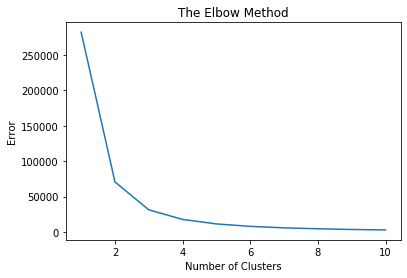

In [12]:
plt.plot(range(1,11), error)
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Error')
plt.show()

In [16]:
#implementing kmeans with the number of cluster being there
kmeans = KMeans(n_clusters = 3, init = 'k-means++' ,max_iter = 300, n_init =10, random_state=0 )
y_kmeans = kmeans.fit_predict(x)

# Visualization of the clusters

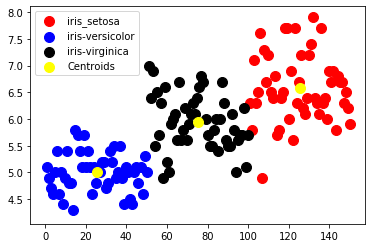

In [20]:

plt.scatter(x[y_kmeans== 0,0], x[y_kmeans==0,1], s=100, c='red', label='iris_setosa')
plt.scatter(x[y_kmeans ==1,0], x[y_kmeans ==1,1], s=100, c='blue', label='iris-versicolor')
plt.scatter(x[y_kmeans ==2,0], x[y_kmeans ==2,1], s=100, c='black', label='iris-virginica')


#plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1],
           s=100, c='yellow', label='Centroids')
plt.legend()

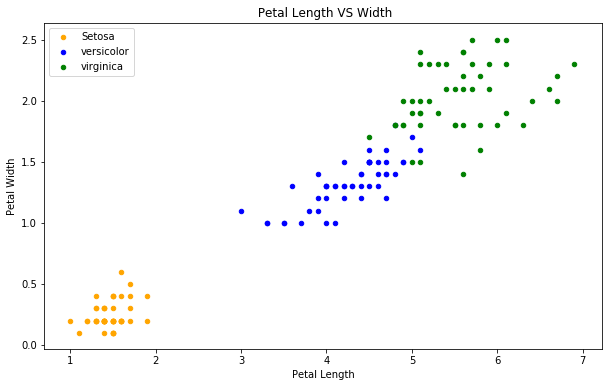

In [23]:
fig = df[df.Species=='Iris-setosa'].plot.scatter(x='PetalLengthCm',y='PetalWidthCm',color='orange', label='Setosa')
df[df.Species=='Iris-versicolor'].plot.scatter(x='PetalLengthCm',y='PetalWidthCm',color='blue', label='versicolor',ax=fig)
df[df.Species=='Iris-virginica'].plot.scatter(x='PetalLengthCm',y='PetalWidthCm',color='green', label='virginica', ax=fig)
fig.set_xlabel("Petal Length")
fig.set_ylabel("Petal Width")
fig.set_title(" Petal Length VS Width")
fig=plt.gcf()
fig.set_size_inches(10,6)
plt.show()

# Density of length and width

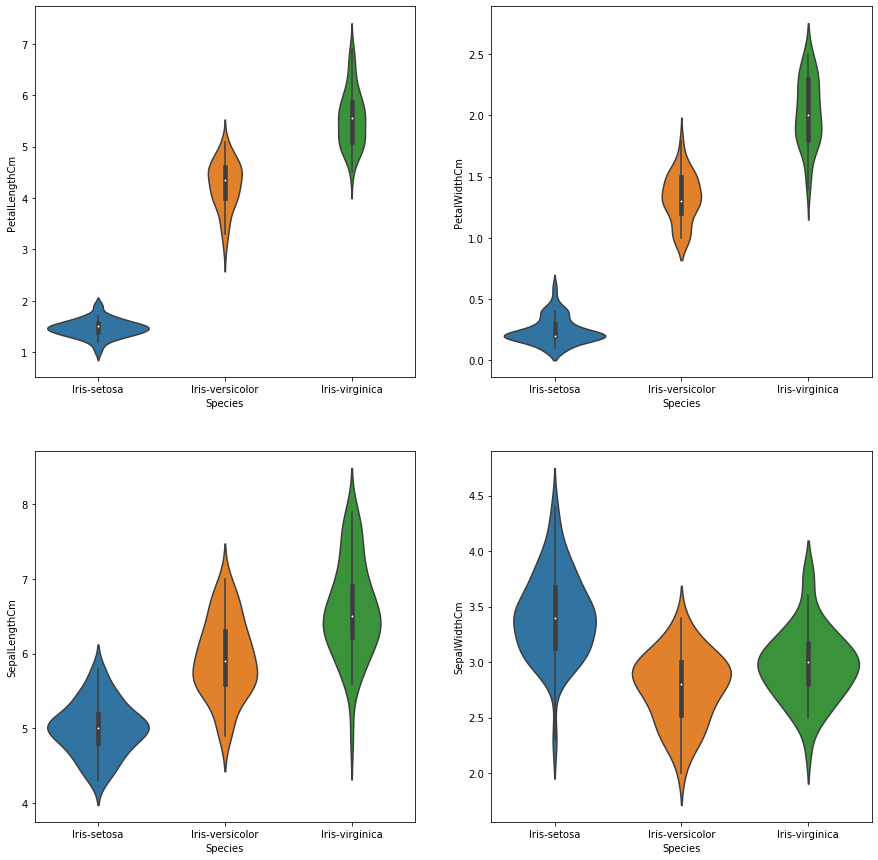

In [25]:
plt.figure(figsize=(15,15))
plt.subplot(2,2,1)
sns.violinplot(x='Species',y='PetalLengthCm',data=df)
plt.subplot(2,2,2)
sns.violinplot(x='Species',y='PetalWidthCm',data=df)
plt.subplot(2,2,3)
sns.violinplot(x='Species',y='SepalLengthCm',data=df)
plt.subplot(2,2,4)
sns.violinplot(x='Species',y='SepalWidthCm',data=df)

# Histogram to see distribution

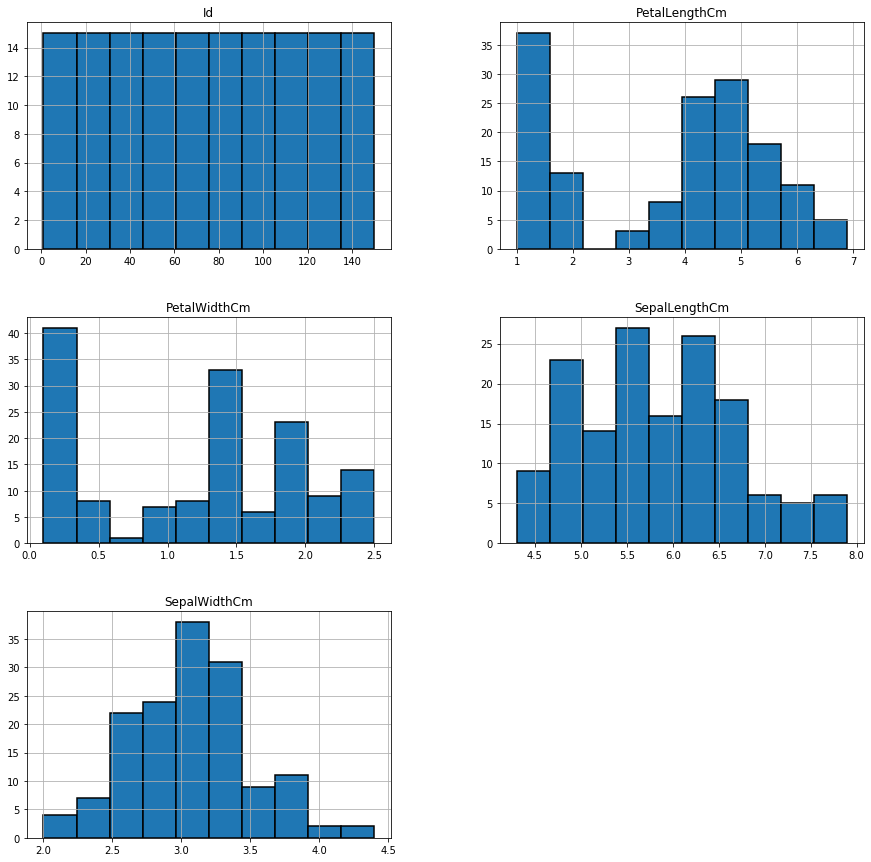

In [28]:
df.hist(edgecolor='black', linewidth=1.5)
fig=plt.gcf()
fig.set_size_inches(15,15)
plt.show()